In [1]:
# import all libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

#import statistics as stats

# avoiding unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
# read the dataset
dataset = sns.load_dataset('diamonds')
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
dataset.shape

(53940, 10)

In [5]:
dataset.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
dataset.describe(include = ["category"])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


# Adding a new column to the dataset

In [8]:
# I want to add price per carat -> create a new column appended to the last column
dataset["price_per_carat"] = dataset["price"] / dataset["carat"]
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


In [9]:
dataset["price_per_carat_is_high"] = np.where(dataset["price_per_carat"] > 1000,1,0)
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_is_high
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161,1


# Apply functions/delete columns

In [10]:
# I want to increase the price of the diamonds in 30% ( price_per_carat is still at old price )

dataset["price"] = dataset["price"] * 1.3
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_is_high
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,1
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,1
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,1
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,1
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,1


In [11]:
# we want to round the price
dataset["rounded_price"] = dataset["price"].apply(math.ceil)
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_is_high,rounded_price
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,1,424
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,1,424
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,1,426
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,1,435
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,1,436


In [12]:
def is_desired(x):
    bool_var = "yes" if(x["cut"] == "Ideal" and x["color"] == "E") else "no!!"
    return bool_var
    

In [13]:
dataset["desired"] = dataset.apply(is_desired, axis=1)
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_is_high,rounded_price,desired
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,1,424,yes
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,1,424,no!!
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,1,426,no!!
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,1,435,no!!
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,1,436,no!!


In [14]:
# delete columns
dataset = dataset.drop(columns = ["price_per_carat", "rounded_price"])
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat_is_high,desired
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1,yes
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1,no!!
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1,no!!
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1,no!!
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1,no!!


In [15]:
# download the csv , index for excel format will be True, csv format will be False
dataset.to_csv("wk_2_dimonds_modified_in_class.csv", index = False)

# Plotting

array([[<Axes: title={'center': 'carat'}>]], dtype=object)

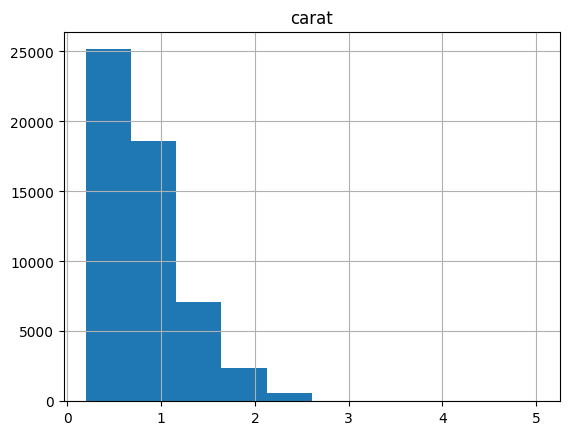

In [16]:
# Panda Histogram

dataset.hist(column="carat")

array([[<Axes: title={'center': 'carat'}>]], dtype=object)

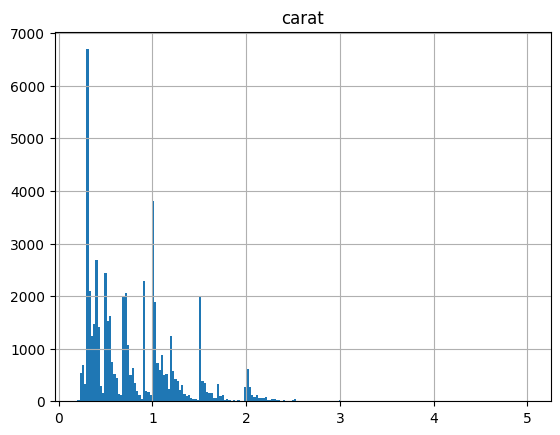

In [17]:
# Histograms with bins ( bigger bin value the more details will show )
dataset.hist(column = "carat", bins = 200)

<Axes: xlabel='carat', ylabel='Density'>

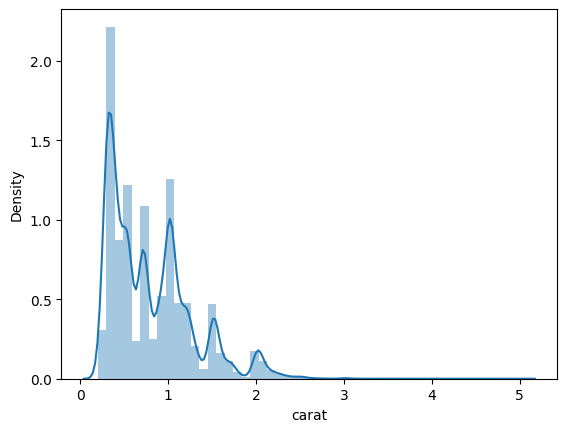

In [18]:
# seaborn
import seaborn as sns
sns.distplot(dataset.carat)

<Axes: xlabel='carat'>

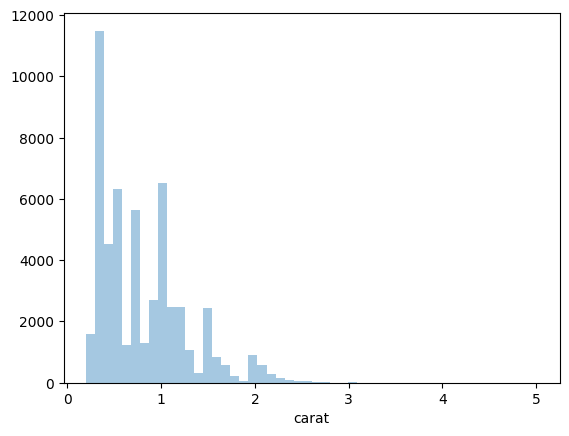

In [19]:
# kde is the blue line, kernel density estimation (KDE)
sns.distplot(dataset.carat, kde = False)

<Axes: xlabel='carat'>

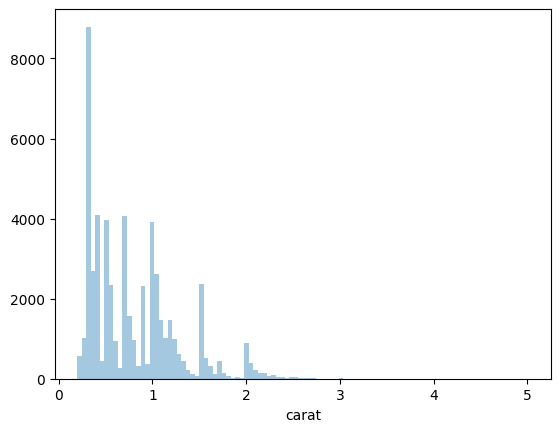

In [20]:
#
sns.distplot(dataset.carat, kde = False, bins = 100)

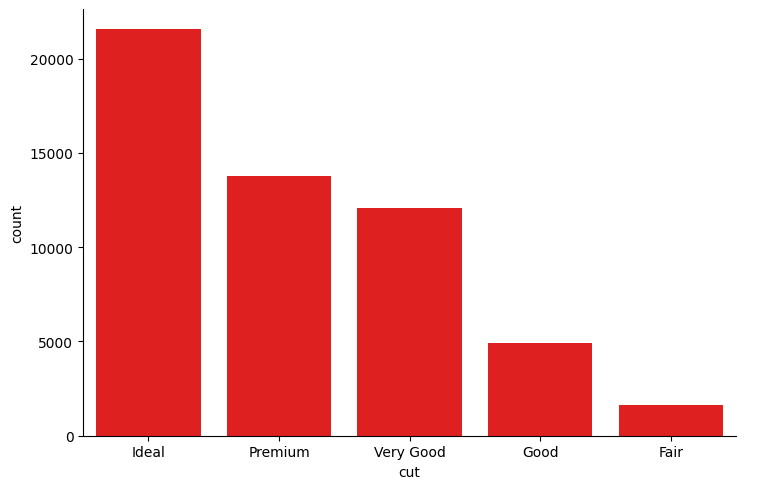

In [21]:
# Bar plot
sns.catplot(x = "cut", data = dataset, aspect = 1.5, kind = "count", color = "r")